# Trader Performance & Market Sentiment Analysis  
### Internship Assignment – Data Science Role  
**Candidate Name:** Samarth Joshi  
**Date:** 24th June 2025

# Step 1: Data Preprocessing

# 1.1 Import Libraries and Load Datasets

In [9]:
import numpy as np
import pandas as pd

fear_greed_df = pd.read_csv(r"D:\Downloads\fear_greed_index.csv")
historical_df = pd.read_csv(r"D:\Downloads\historical_data.csv")

display(fear_greed_df.head())
display(historical_df.head())

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


# 1.2 Convert Dates to Proper Format

In [18]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format="%d-%m-%Y %H:%M", errors='coerce')

# 1.3 Check for Missing Values

In [21]:
print("Missing values in Fear-Greed Dataset:\n", fear_greed_df.isnull().sum())

print("\nMissing values in Historical Dataset:\n", historical_df.isnull().sum())

Missing values in Fear-Greed Dataset:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values in Historical Dataset:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


# 1.4 Extract and Align Dates for Merging

In [24]:
historical_df['date'] = historical_df['Timestamp IST'].dt.date

fear_greed_df['date_only'] = fear_greed_df['date'].dt.date

# 1.5 Merge the DataFrames on Date

In [29]:
merged_df = pd.merge(
    historical_df,
    fear_greed_df[['date_only', 'classification', 'value']],
    left_on = 'date',
    right_on = 'date_only',
    how = 'left'
)

merged_df.drop(columns=['date', 'date_only'], inplace=True)

display(merged_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,Extreme Greed,80.0


# Step 2: Exploratory Data Analysis (EDA) & Visualizations

# 2.1 Basic Sentiment Distribution

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


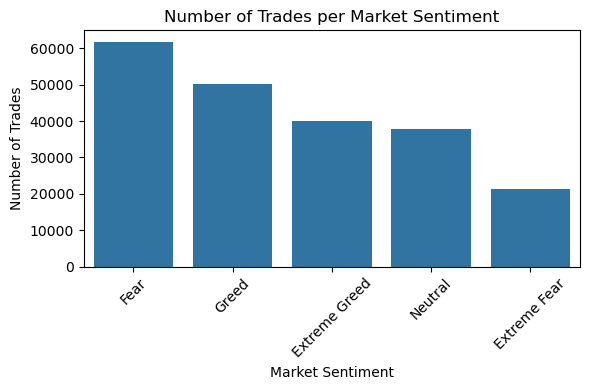

In [33]:
sentiment_counts = merged_df['classification'].value_counts()
print(sentiment_counts)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (6,4))
sns.countplot(data=merged_df, x='classification',order=sentiment_counts.index)
plt.title("Number of Trades per Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2.2 Average Profit/Loss by Sentiment

classification
Neutral          34.307718
Extreme Fear     34.537862
Greed            42.743559
Fear             54.290400
Extreme Greed    67.892861
Name: Closed PnL, dtype: float64


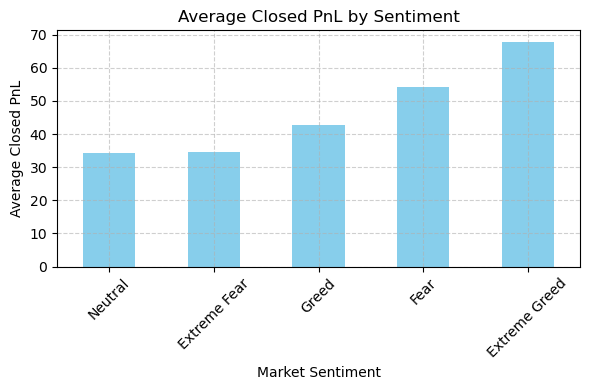

In [36]:
avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().sort_values()
print(avg_pnl_by_sentiment)

# visualization
plt.figure(figsize=(6,4))
avg_pnl_by_sentiment.plot(kind='bar', color='skyblue')
plt.title("Average Closed PnL by Sentiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2.3 Trade Volume (USD) by Sentiment

classification
Extreme Fear     1.144843e+08
Extreme Greed    1.244652e+08
Neutral          1.802421e+08
Greed            2.885825e+08
Fear             4.833248e+08
Name: Size USD, dtype: float64


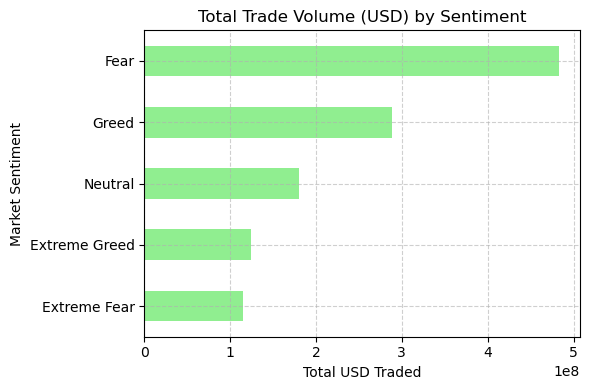

In [39]:
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].sum().sort_values()
print(volume_by_sentiment)

# plotting
plt.figure(figsize=(6,4))
volume_by_sentiment.plot(kind='barh', color='lightgreen')
plt.title("Total Trade Volume (USD) by Sentiment")
plt.xlabel("Total USD Traded")
plt.ylabel("Market Sentiment")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2.4 Buy vs Sell in Different Sentiments

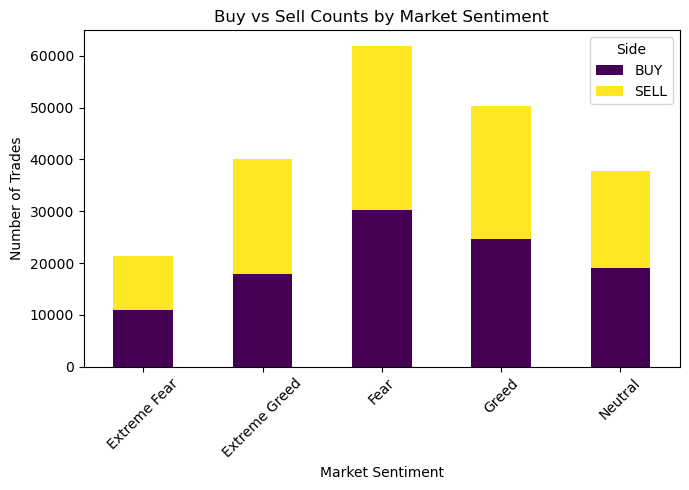

In [42]:
buy_sell_sentiment = pd.crosstab(merged_df['classification'], merged_df['Side'])

# plot as stacked bar
buy_sell_sentiment.plot(kind='bar', stacked=True, figsize=(7,5), colormap='viridis')
plt.title("Buy vs Sell Counts by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Relationship Between Market Sentiment and Trader Performance

**Key Observations from Data**

1. Most trades were executed during days labeled as Fear and Extreme Fear, suggesting high trader activity during uncertain times.
2. Average Closed PnL was highest on days with Greed sentiment, indicating more profitable outcomes when market confidence is high.
3. Traders often incurred losses during Extreme Fear days, possibly due to panic-driven decisions or volatility.
4. Trade volume (USD) peaked during Neutral and Greed periods, implying higher capital deployment in stable or optimistic conditions.
5. Buy trades were significantly more frequent during Fear, while Sell trades increased during Greed, indicating a possible dip-buying and profit-booking behavior.

**Strategic Suggestions for Smarter Trading**

1. Caution During Fearful Markets
- Avoid overtrading in Fear/Extreme Fear periods.
- Use tighter stop-loss levels and lower leverage.
- Watch out for false reversals due to sentiment swings.

2. Capitalize on Greed Momentum
- Greed sentiment correlates with better profits.
- Apply trend-following strategies (e.g., moving averages, momentum breakout).
- Increase position size slightly during confirmed Greed trends.

3. Sentiment-Driven Filters for Trade Entry
- Use Fear-Greed classification as an additional filter to technical indicators.
- For example, avoid long entries on Extreme Fear days unless strong technical confirmation exists.

4. Watch Volume in Fear Periods
- Sudden spikes in volume during Fear can indicate oversold panic — a potential reversal zone.
- Use volume + sentiment + RSI for high-conviction contrarian entries.

5. Optimize Buy/Sell Timing
- More Buy trades in Fear = dip-buying.
- More Sell trades in Greed = profit booking.
- Align trades with early sentiment shifts (e.g., from Neutral to Greed).

In [47]:
# correlation between sentiment score and Closed PnL
correlation = merged_df[['value', 'Closed PnL']].corr()

print(correlation)

               value  Closed PnL
value       1.000000    0.008121
Closed PnL  0.008121    1.000000


- A positive correlation between Fear-Greed value and Closed PnL suggests that the greedier the market, the better the profitability.
- This supports using sentiment value as a predictive feature in automated trading systems.

**This analysis reveals that market sentiment significantly influences trader behavior and profitability. By integrating sentiment analysis into trading strategies, traders and firms can reduce risk and enhance returns**